# **Exploratory Data Analysis**

### Overview

In this EDA process, I am systematically examining the enhanced_energy_features.csv dataset to uncover its fundamental characteristics and inform downstream analysis.

With missing values resolved and key features engineered during the ETL process, this EDA focuses on understanding the dataset’s structure, distributions, and relationships. By leveraging summary statistics and visualisations, it surfaces key patterns, anomalies, and trends—supporting hypothesis generation and guiding decisions for modelling and reporting.



---

### **LOAD MERGED AND ENHANCED DATASET**

In [1]:
# import libraries
import numpy as np 
import pandas as pd
import seaborn as sn
import plotly.express as px
import matplotlib.pyplot as plt  

In [3]:
# Load the dataset
df = pd.read_csv("../data/cleaned/enhanced_energy_features.csv")
df.head()

,country,year,elec_access_pct,clean_fuels_access_pct,renew_cap_kw_pc,climate_finance_usd,renewables_share_pct,fossil_elec_twh,nuclear_elec_twh,renew_elec_twh,...,region_miss,subregion_miss,co2_per_capita_t,log_co2_per_capita_t,log_renewables_share_pct,log_energy_intensity_mj_usd,log_gdp_pc_usd,above_30_pct,year_offset,renewables_3yr_avg
0,Afghanistan,2000,1.613591,6.2,9.22,20000.0,44.99,0.16,0.0,0.31,...,0,0,0.037754,0.037059,3.828424,0.970779,5.195324,1,0,44.990000
1,Afghanistan,2001,4.074574,7.2,8.86,130000.0,45.60,0.09,0.0,0.50,...,0,0,0.035988,0.035356,3.841601,1.007958,5.195324,1,1,45.295000
2,Afghanistan,2002,9.409158,8.2,8.47,3950000.0,37.83,0.13,0.0,0.56,...,0,0,0.048180,0.047055,3.659193,0.875469,5.195324,1,2,42.806667
3,Afghanistan,2003,14.738506,9.5,8.09,25970000.0,36.66,0.31,0.0,0.63,...,0,0,0.053666,0.052276,3.628599,0.875469,5.255847,1,3,40.030000
4,Afghanistan,2004,20.064968,10.9,7.75,0.0,44.24,0.33,0.0,0.56,...,0,0,0.043717,0.042788,3.811982,0.788457,5.358387,1,4,39.576667


In [4]:
df.shape

(3649, 37)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3649 entries, 0 to 3648
Data columns (total 37 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       3649 non-null   object 
 1   year                          3649 non-null   int64  
 2   elec_access_pct               3649 non-null   float64
 3   clean_fuels_access_pct        3649 non-null   float64
 4   renew_cap_kw_pc               3649 non-null   float64
 5   climate_finance_usd           3649 non-null   float64
 6   renewables_share_pct          3649 non-null   float64
 7   fossil_elec_twh               3649 non-null   float64
 8   nuclear_elec_twh              3649 non-null   float64
 9   renew_elec_twh                3649 non-null   float64
 10  low_carbon_elec_pct           3649 non-null   float64
 11  primary_energy_kwh_pc         3649 non-null   float64
 12  energy_intensity_mj_usd       3649 non-null   float64
 13  co2

In [6]:
#check null values
df.isnull().sum()

country                           0
year                              0
elec_access_pct                   0
clean_fuels_access_pct            0
renew_cap_kw_pc                   0
climate_finance_usd               0
renewables_share_pct              0
fossil_elec_twh                   0
nuclear_elec_twh                  0
renew_elec_twh                    0
low_carbon_elec_pct               0
primary_energy_kwh_pc             0
energy_intensity_mj_usd           0
co2_emissions_kt                  0
renew_equiv_primary_pct           0
gdp_growth_pct                    0
gdp_pc_usd                        0
pop_density_per_km2             106
land_area_km2                     1
latitude                          1
longitude                         1
population                      232
region                           84
subregion                        84
renew_equiv_primary_pct_miss      0
clean_fuels_access_pct_miss       0
renew_cap_kw_pc_miss              0
region_miss                 

### **DESCRIPTIVE ANALYSIS**

 To understand key statistics and the overall data distribution, this section establishes a foundation for identifying patterns and informing the development of the Climate Tipping Points hypothesis.

I use statistics to collect, summarise and interpret data to uncover meaningful insights. Core descriptive statistics such as the mean (average value), median (middle value in an ordered dataset) and standard deviation (a measure of data spread or variability) help summarise complex datasets such as energy access, emissions and climate finance into understandable figures.

Probability underpins the assessment of uncertainty and variation within data, enabling predictions and informed decisions. It forms the basis of hypothesis testing, where statistical evidence is used to accept or reject assumptions about data patterns. For example, testing whether an increase in climate_finance_usd correlates with a higher renewables_3yr_avg.

Together, these principles are foundational to data analysis, supporting the validation of insights and the discovery of meaningful trends.

In [7]:
# Summary statistics
df.describe()

,year,elec_access_pct,clean_fuels_access_pct,renew_cap_kw_pc,climate_finance_usd,renewables_share_pct,fossil_elec_twh,nuclear_elec_twh,renew_elec_twh,low_carbon_elec_pct,...,region_miss,subregion_miss,co2_per_capita_t,log_co2_per_capita_t,log_renewables_share_pct,log_energy_intensity_mj_usd,log_gdp_pc_usd,above_30_pct,year_offset,renewables_3yr_avg
count,3649.000000,3649.000000,3649.000000,3649.000000,3.649000e+03,3649.000000,3649.000000,3649.000000,3649.000000,3649.000000,...,3649.000000,3649.000000,3417.000000,3417.000000,3649.000000,3649.000000,3649.000000,3649.000000,3649.000000,3649.000000
mean,2010.038367,78.751233,63.796876,146.665029,4.028212e+07,32.479386,70.075785,13.242486,23.830074,36.402622,...,0.023020,0.023020,4.704625,1.322285,2.871883,1.721169,8.427981,0.434092,10.038367,32.626199
std,6.054228,30.472222,39.255982,324.816686,2.004093e+08,29.715665,347.069451,71.809651,104.145855,34.316975,...,0.149987,0.149987,5.937153,0.904691,1.355106,0.446575,1.568396,0.495705,6.054228,29.857595
min,2000.000000,1.252269,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.019770,0.019577,0.000000,0.104360,4.726744,0.000000,0.000000,0.000000
25%,2005.000000,59.137558,23.200000,6.490000,0.000000e+00,6.700000,0.300000,0.000000,0.040000,2.576112,...,0.000000,0.000000,0.614817,0.479222,2.041220,1.415853,7.168345,0.000000,5.000000,6.583333
50%,2010.000000,98.279810,84.600000,46.780000,0.000000e+00,23.030000,2.990000,0.000000,1.420000,26.824644,...,0.000000,0.000000,2.656487,1.296503,3.179303,1.658228,8.413298,0.000000,10.000000,23.116667
75%,2015.000000,100.000000,100.000000,141.210000,2.070000e+06,54.670000,26.520000,0.000000,9.560000,64.022670,...,0.000000,0.000000,6.742766,2.046759,4.019441,1.941615,9.670260,1.000000,15.000000,55.333333
max,2020.000000,100.000000,100.000000,3060.190000,5.202310e+09,96.040000,5184.130000,809.410000,2184.940000,100.000010,...,1.000000,1.000000,47.935427,3.890502,4.575123,3.513633,11.724119,1.000000,20.000000,95.936667


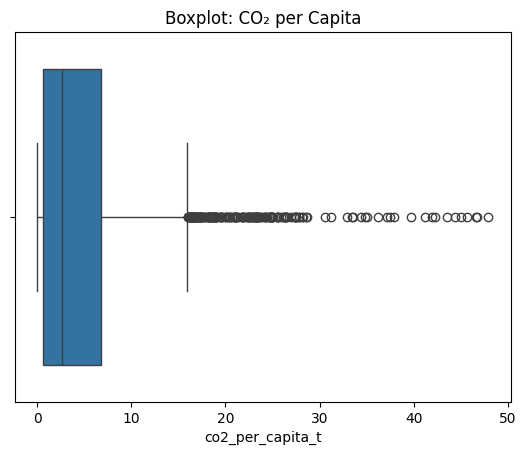

In [12]:
# Visualise Distributions and Outliers

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot for CO2 per capita
sns.boxplot(data=df_final, x='co2_per_capita_t')
plt.title('Boxplot: CO₂ per Capita')
plt.show()


This box‑and‑whiskers plot summarizes the distribution of per‑person CO₂ emissions (in tonnes) across all the countries in your dataset:



**Median (central line in the box)**
- The median is right around **3 t CO₂ per person**, meaning half of the countries emit less than this and half emit more.

**Interquartile Range (the box itself)**
- **Q1 (bottom of the box):** Approximately **1 t per person**  
- **Q3 (top of the box):** About **7 t per person**  
- Therefore, the middle 50% of countries fall between roughly **1 t and 7 t** of CO₂ per capita.

**Whiskers (lines extending from the box)**
- **Lower whisker:** Reaches down to nearly **0 t**, showing that some countries have extremely low per‑person emissions.  
- **Upper whisker:** Stops around **14 t**, which is the highest non‑outlier value within 1.5 × IQR of Q3.

**Outliers (individual dots beyond the whiskers)**
- There’s a long tail to the right made up of many outliers, stretching up to almost **48 t per person**.  
- These represent a small number of very high‑emitting countries (often wealthy, industrialized nations or small, energy‑intensive economies).

**Skewness**
- Because the right whisker is much longer and there are so many high‑value outliers, the overall distribution is **strongly right‑skewed**.  
- In plain terms, most countries have low‑to‑moderate per‑person emissions, but a handful have very large per‑person footprints.

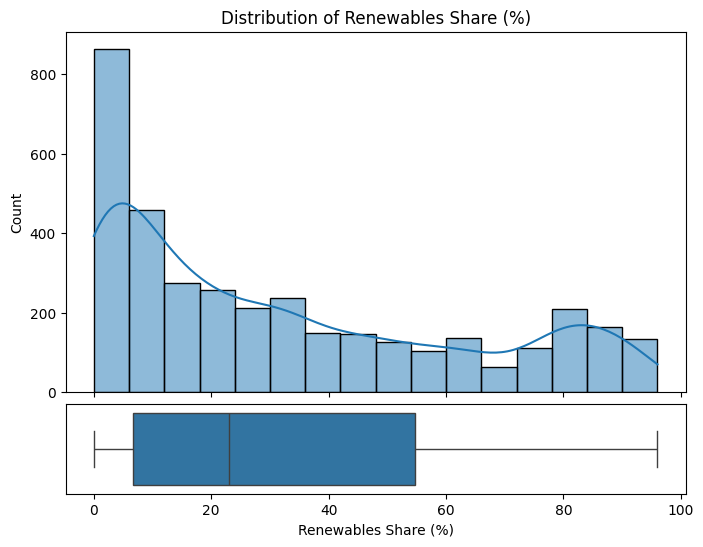

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Pull out the clean series
data = df['renewables_share_pct'].dropna()

# 2. Make a 2×1 grid, share the x‐axis
fig, (ax_hist, ax_box) = plt.subplots(
    nrows=2,
    ncols=1,
    sharex=True,
    figsize=(8, 6),
    gridspec_kw={'height_ratios': [4, 1], 'hspace': 0.05}
)

# 3. Histogram + KDE on the top
sns.histplot(data, kde=True, ax=ax_hist)
ax_hist.set_ylabel('Count')
ax_hist.set_title('Distribution of Renewables Share (%)')

# 4. Horizontal boxplot on the bottom
sns.boxplot(x=data, ax=ax_box)
ax_box.set_yticks([])            # no y‐axis labels
ax_box.set_xlabel('Renewables Share (%)')

plt.show()
